In [8]:
# import library
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
 
from tensorflow.keras.layers import Dense, LSTM

In [9]:
data_train = pd.read_csv('DailyDelhiClimateTrain.csv')
data_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [10]:
data_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Text(0.5, 1.0, 'Temperature Average')

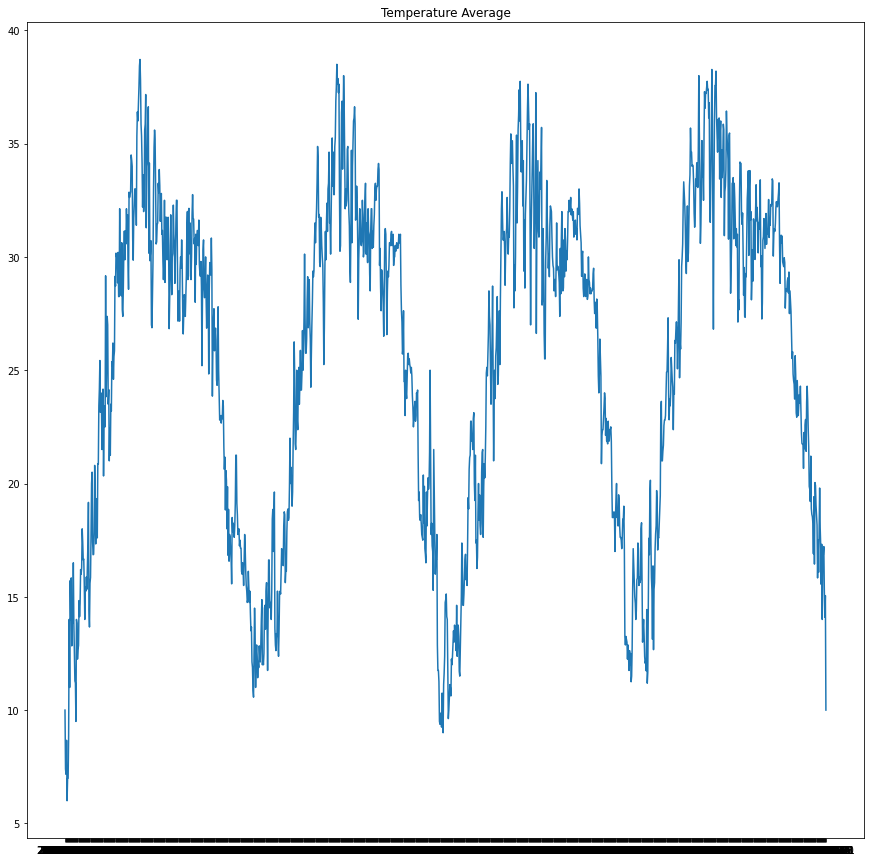

In [11]:
dates = data_train['date'].values
temp = data_train['meantemp'].values
 
plt.figure(figsize=(15,15))
plt.plot(dates, temp)
plt.title('Temperature Average')

In [12]:
min = temp.min()
max = temp.max()

scale = max - min
boundery = scale * 0.1
print(boundery)

3.271428571428572


In [13]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer) :
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder=True )
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [14]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([LSTM(60, return_sequences=True),
                                    LSTM(60),
                                    
                                    Dense(30, activation='relu'),
                                    Dense(10, activation='relu'),
                                    Dense(1)])

In [15]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
history = model.fit(train_set, epochs=100)

Epoch 1/100
15/15 [==============================] - 5s 90ms/step - loss: 25.2524 - mae: 25.7524
Epoch 2/100
15/15 [==============================] - 1s 88ms/step - loss: 25.0594 - mae: 25.5594
Epoch 3/100
15/15 [==============================] - 1s 88ms/step - loss: 24.8885 - mae: 25.3885
Epoch 4/100
15/15 [==============================] - 1s 87ms/step - loss: 24.7214 - mae: 25.2214
Epoch 5/100
15/15 [==============================] - 1s 88ms/step - loss: 24.5451 - mae: 25.0451
Epoch 6/100
15/15 [==============================] - 1s 87ms/step - loss: 24.3518 - mae: 24.8518
Epoch 7/100
15/15 [==============================] - 2s 89ms/step - loss: 24.1328 - mae: 24.6328
Epoch 8/100
15/15 [==============================] - 1s 87ms/step - loss: 23.8794 - mae: 24.3794
Epoch 9/100
15/15 [==============================] - 1s 87ms/step - loss: 23.5832 - mae: 24.0832
Epoch 10/100
15/15 [==============================] - 1s 87ms/step - loss: 23.2355 - mae: 23.7355
Epoch 11/100
15/15 [=========

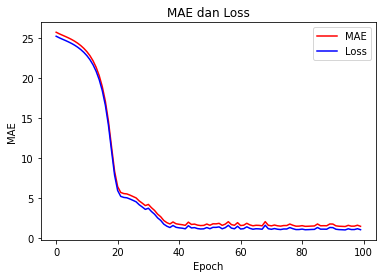

<Figure size 432x288 with 0 Axes>

In [18]:
mae = history.history['mae']
loss = history.history['loss']
 
epochs = range(len(mae))
 
plt.plot(epochs, mae, 'r', label='MAE')                 
plt.plot(epochs, loss, 'b', label='Loss')
plt.title('MAE dan Loss')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.figure()                                                                      
plt.show()